# Wholesale customers clustering

In this notebook a clustering is performed for wholesale customer data . 
The dataset can be found here: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Source of data (2014):
Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal

Attribute Information:
- 1) FRESH: annual spending (m.u.) on fresh products (Continuous); 
- 2) MILK: annual spending (m.u.) on milk products (Continuous); 
- 3) GROCERY: annual spending (m.u.)on grocery products (Continuous); 
- 4) FROZEN: annual spending (m.u.)on frozen products (Continuous) 
- 5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
- 6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
- 7) CHANNEL: customer Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 
- 8) REGION: customer region Lisnon, Oporto or Other (Nominal) 

Descriptive Statistics: 
- (Minimum, Maximum, Mean, Std. Deviation) 
- FRESH ( 3, 112151, 12000.30, 12647.329) 
- MILK (55, 73498, 5796.27, 7380.377) 
- GROCERY (3, 92780, 7951.28, 9503.163) 
- FROZEN (25, 60869, 3071.93, 4854.673) 
- DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854) 
- DELICATESSEN (3, 47943, 1524.87, 2820.106) 

REGION Frequency 
- Lisbon 77 
- Oporto 47 
- Other Region 316 
- Total 440 

CHANNEL Frequency 
- Horeca 298 
- Retail 142 
- Total 440 

Relevant Papers:
- Cardoso, Margarida G.M.S. (2013). Logical discriminant models Chapter 8 in Quantitative Modeling
in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. 
ISBN 978-9814407717 
- Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). 
Enhancing the selection of a model-based clustering with external qualitative variables. 
RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, 
Projet select, UniversitÃ© Paris-Sud 11 

## Loading the data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df=pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [4]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

## Data exploration

In [5]:
# Statistics of all variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [6]:
# Here 1=Horeca, 2= Retail
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [8]:
# Here 1=Lisbon, 2= Oporto, 3=Other region
df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

<Figure size 432x288 with 0 Axes>

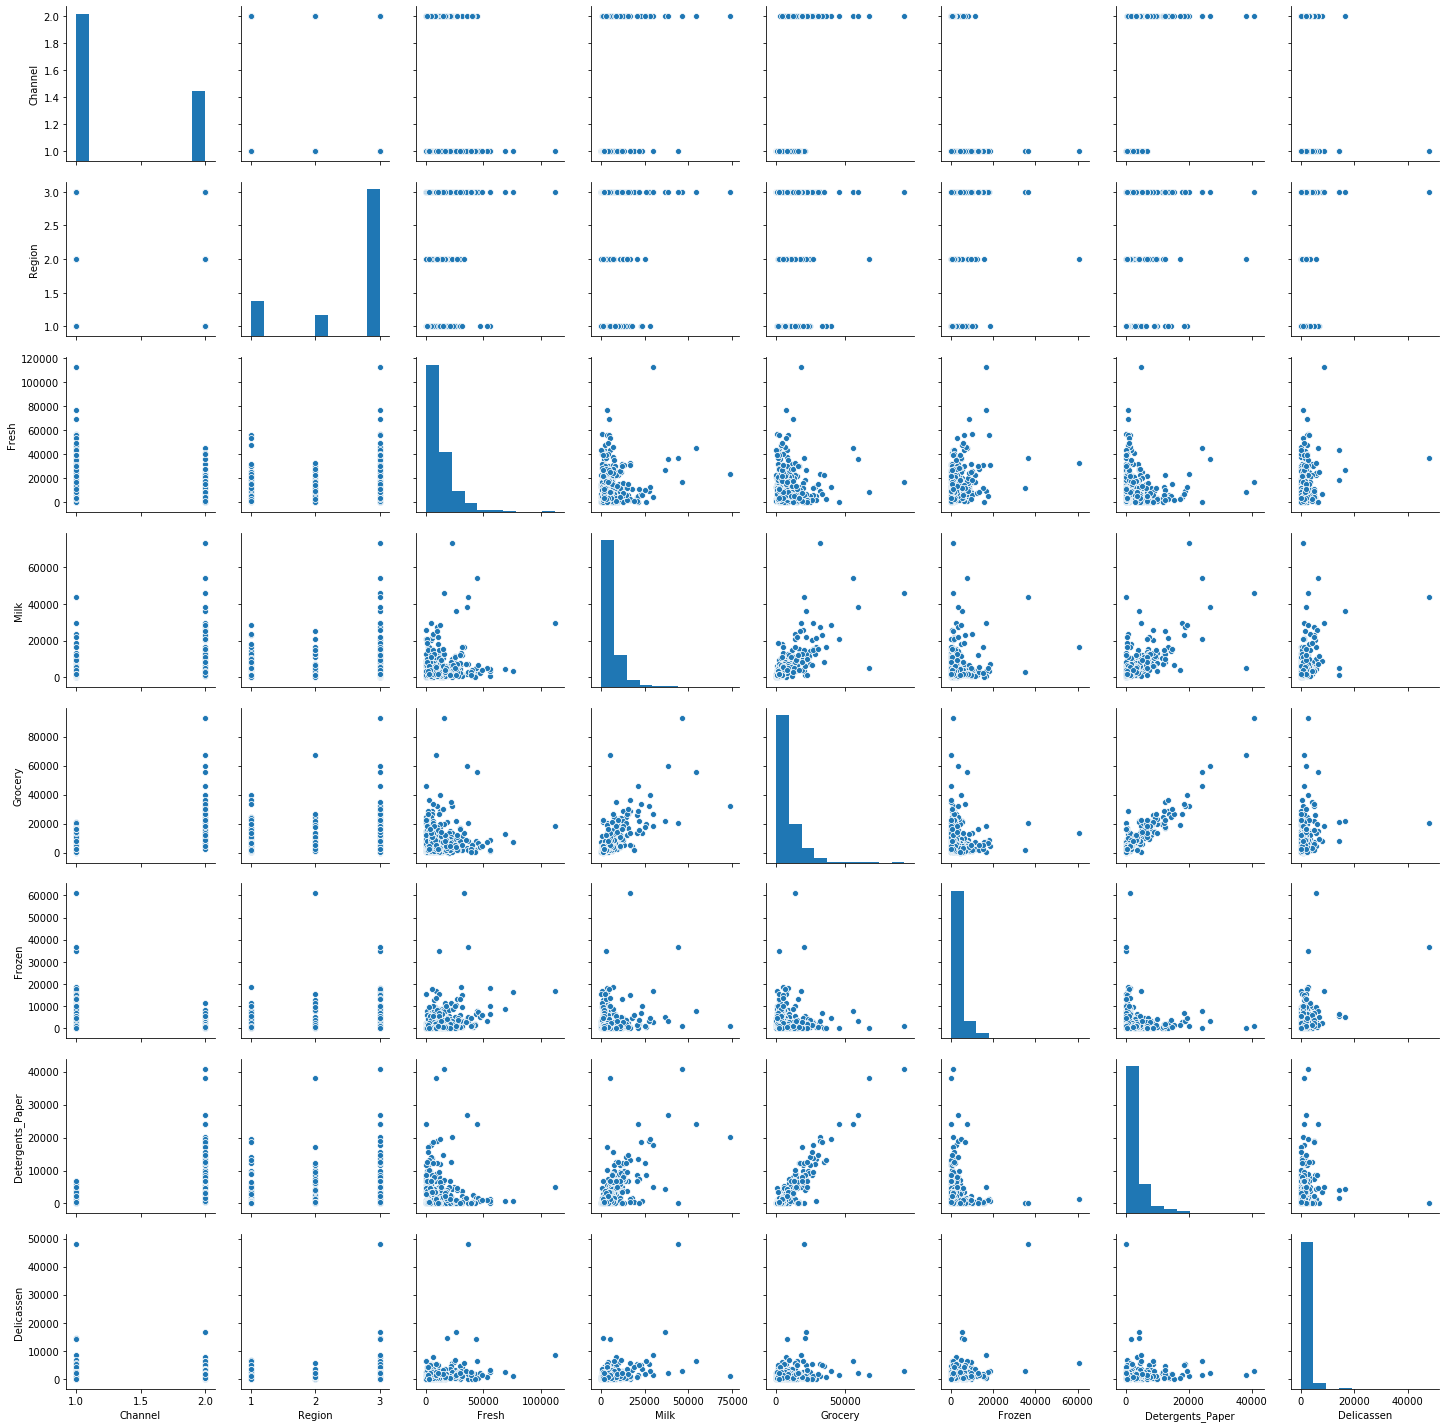

In [9]:
# Pairwise scatterplots between all variables: checking the outliers and linearity
from seaborn import pairplot
plt.tight_layout()
pairplot(df)

(8.0, 0.0)

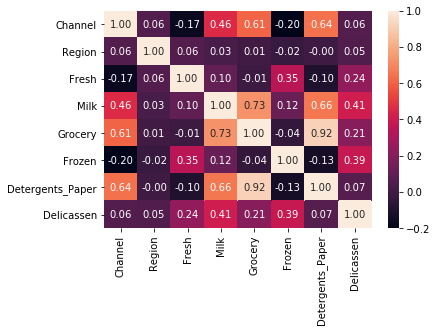

In [10]:
# Create a heatmap showing correlation between variables
corr = df.corr().round(2)
ax=sns.heatmap(corr,annot=True,fmt='.2f')
bottom, top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

## Pre-processing of the data

### a) One-hot encoding of the categorical data

In [11]:
df.iloc[:,0:2]=df.iloc[:,0:2].astype('category')
df1=pd.get_dummies(df)
df1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


### b) Standard scaling of the data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
features_std=scaler.fit_transform(df1.astype(float))
features_std[0:3]

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906, -1.44865163,  1.44865163, -0.46056619, -0.34582203,
         0.62642243],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105, -1.44865163,  1.44865163, -0.46056619, -0.34582203,
         0.62642243],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255, -1.44865163,  1.44865163, -0.46056619, -0.34582203,
         0.62642243]])

## K-means clustering model with optimum k

### a) Selecting K for K-means clustering

Let's group the data to K groups with K varying.

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [15]:
# Create parameter set for varying K
n_clusters=[2,4,6,8,10,12,14,16,18,20]

Let's calculate inertia as a function of k. Inertia is the mean squared distance between each instance and its closest centroid.

Text(0, 0.5, 'Inertia')

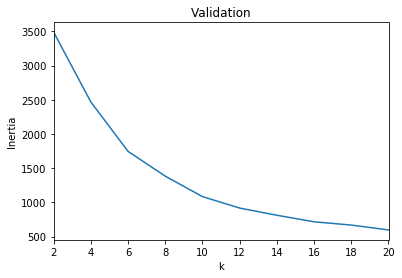

In [16]:
# Plot the inertia as a function of K
def inertia_funct(k,X):
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(features_std)
    inertia= model.inertia_
    return(inertia)
inertia_scores = [inertia_funct(k,features_std) for k in n_clusters]
inertia_scores = pd.Series(inertia_scores, index = n_clusters)
inertia_scores.plot(title = "Validation")
plt.xlabel("k")
plt.ylabel("Inertia")

The inertia is usually quite coarse method for selecting the best k. Here it seems that the inertia decreases clearly until k=6, where there is an inflexion point. Another slight inflexion point could be said to occur at k=10. 

Let's also plot silhoutte score as a function of k. That is usually a better method for selecting k.

Silhoutte score is the mean silhoutte coefficient over all instances. Each instance's silhouette coefficient is: (b-a)/max(a,b). a= mean intracluster distance, b=mean nearest-cluster distance.

Text(0, 0.5, 'Silhouette score')

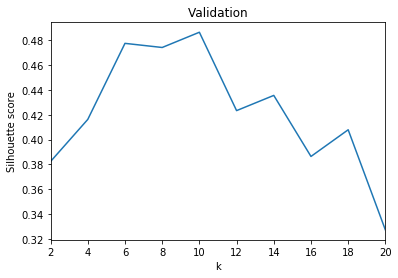

In [17]:
# Plot the silhoutte score as a function of K
def silh_funct(k,X):
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(features_std)
    silhouette=silhouette_score(features_std,model.labels_)
    return(silhouette)
silh_scores = [silh_funct(k,features_std) for k in n_clusters]
silh_scores = pd.Series(silh_scores, index = n_clusters)
silh_scores.plot(title = "Validation")
plt.xlabel("k")
plt.ylabel("Silhouette score")

According to silhouette score, the best k is at k=10.

In [18]:
# Create K-means object with k=10 and train the model
cluster=KMeans(n_clusters=10, random_state=42, n_jobs=-1)
clf=cluster.fit(features_std)

In [19]:
#Compute silhoutte score and inertia for the model
print('Silhouette score: ',silhouette_score(features_std,cluster.labels_))
print('Inertia: ',cluster.inertia_)

Silhouette score:  0.486442018047789
Inertia:  1083.4281194588814


Let's look at how the clusters differ in terms of different attributes.

## b) Analysing the clusters

In [20]:
# Insert cluster information to the dataset
df['Cluster']=cluster.labels_
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2


Let's check how many observations there are in each cluster.

In [21]:
df.groupby(['Cluster']).count()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,164,164,164,164,164,164,164,164
1,59,59,59,59,59,59,59,59
2,97,97,97,97,97,97,97,97
3,27,27,27,27,27,27,27,27
4,10,10,10,10,10,10,10,10
5,1,1,1,1,1,1,1,1
6,2,2,2,2,2,2,2,2
7,18,18,18,18,18,18,18,18
8,45,45,45,45,45,45,45,45


There seems to be one big cluster of 164 observations, then four clusters with at least 20 observations , and 5 clusters less than 20 observations. It is quite questionable whether the smallest clusters really make sense.

Let's look at the mean values of the attributes by Cluster

In [22]:
df.groupby(['Cluster']).mean().round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,8364.93,2946.95,3455.01,2130.63,792.90,983.27
1,12902.25,3870.20,4026.14,3127.32,950.53,1197.15
2,9001.07,8514.81,13488.04,1389.68,5643.68,1598.01
3,10870.30,1767.96,4053.63,3703.41,453.48,939.11
4,17988.80,36037.50,47380.20,2895.40,23449.50,4083.00
5,36847.00,43950.00,20170.00,36534.00,239.00,47943.00
6,22015.50,9937.00,7844.00,47939.00,671.50,4153.50
7,7218.94,9424.72,13494.56,1618.89,6760.72,1240.33
8,33516.87,4564.73,5138.84,7791.98,792.11,2410.22


It is not very easy to see the difference from the table format. Let's create boxplots for different attributes, grouped by clusters, in order to understand how the clusters differ from each other.

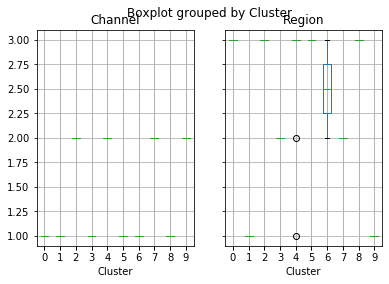

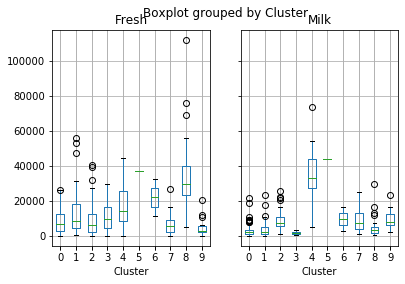

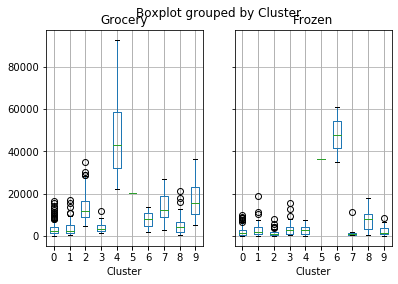

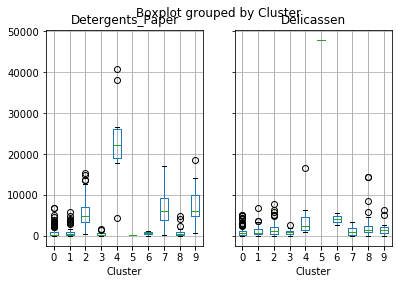

In [23]:
# Create boxplots for different attributes grouped by clusters
attr1=list(df.columns[::2][:-1])
attr2=list(df.columns[1::2])
for i, elem in enumerate(zip(attr1,attr2)):
    slice=list(elem)
    df.boxplot(column=slice,by='Cluster',layout=(1,2))
    plt.xlabel('Cluster')

Since the boxplots for channel and region were a bit difficult to read, let's plot value_counts for them.

In [24]:
for i in range(10):
    print('Cluster ',i)
    print('------------')
    print(df[df.Cluster==i]['Channel'].value_counts())
    print(df[df.Cluster==i]['Region'].value_counts())
    print(' ')

Cluster  0
------------
1    164
2      0
Name: Channel, dtype: int64
3    164
2      0
1      0
Name: Region, dtype: int64
 
Cluster  1
------------
1    59
2     0
Name: Channel, dtype: int64
1    59
3     0
2     0
Name: Region, dtype: int64
 
Cluster  2
------------
2    97
1     0
Name: Channel, dtype: int64
3    97
2     0
1     0
Name: Region, dtype: int64
 
Cluster  3
------------
1    27
2     0
Name: Channel, dtype: int64
2    27
3     0
1     0
Name: Region, dtype: int64
 
Cluster  4
------------
2    10
1     0
Name: Channel, dtype: int64
3    8
2    1
1    1
Name: Region, dtype: int64
 
Cluster  5
------------
1    1
2    0
Name: Channel, dtype: int64
3    1
2    0
1    0
Name: Region, dtype: int64
 
Cluster  6
------------
1    2
2    0
Name: Channel, dtype: int64
3    1
2    1
1    0
Name: Region, dtype: int64
 
Cluster  7
------------
2    18
1     0
Name: Channel, dtype: int64
2    18
3     0
1     0
Name: Region, dtype: int64
 
Cluster  8
------------
1    45
2     0


If the clusters are compared with regards to channel and region it shows as:
- Channel 1 (Horeca): clusters 0,1,3,8
- Channel 2 (Retail): clusters 2,4,7,9
    
Clusters 5 and 6 have only 1-2 observations , so let's leave them out from this listing. It is quite probably some other attribute that has made these observations to form their own clusters.

If the clusters are compared, following observations can be made of their differences:
- Cluster 0: Low spend on other than fresh products
- Cluster 1: Low spend on other than fresh products, a bit higher spend on fresh than cluster 0
- Cluster 2: Low spend on other than groceries, detergents_paper.
- Cluster 3: Low spend on other than fresh products,lowest spend on milk.
- Cluster 4: highest spend on milk products and detergents_paper.
- Cluster 5: this cluster only contains some outliers.
- Cluster 6: highest spend on frozen products
- Cluster 7: Low spend on other than detergents_paper, for which quite high spend.
- Cluster 8: highest spend on fresh products
- Cluster 9: Second largets spend on grocery products and detergents_paper.

It depends on the case whether it is beneficial to cluster the customers to this many clusters. If the idea is to use different marketing campaigns to different clusters, and that does not increase costs too much, it may be viable. 

However, if 10 different type of processes increase costs considerable, it might make sense to define smaller number of clusters.

Let's make another clustering model with a smaller k, and analyse that would look.

## K-means clustering model with smaller k

Let's try clustering with k=3.

In [25]:
# Create K-means object with k=3 and train the model
cluster3=KMeans(n_clusters=3, random_state=42, n_jobs=-1)
clf3=cluster3.fit(features_std)

In [26]:
# Insert cluster information to the dataset
df['Cluster3']=cluster3.labels_
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,Cluster3
0,2,3,12669,9656,7561,214,2674,1338,2,1
1,2,3,7057,9810,9568,1762,3293,1776,2,1
2,2,3,6353,8808,7684,2405,3516,7844,2,1
3,1,3,13265,1196,4221,6404,507,1788,0,0
4,2,3,22615,5410,7198,3915,1777,5185,2,1


Let's check how many observations there are in each cluster.

In [29]:
df.groupby(['Cluster3'])[df.columns[:-2]].count()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster3,,,,,,,,
0,238,238,238,238,238,238,238,238
1,138,138,138,138,138,138,138,138
2,64,64,64,64,64,64,64,64


Now the observations are split to different clusters with the share of 55% /31% /15%.

Let's look at the mean values of different attributes by cluster.

In [32]:
df.groupby(['Cluster3'])[df.columns[:-2]].mean().round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster3,,,,,,
0,13519.48,3177.82,3878.17,3764.42,753.22,1274.71
1,9142.38,11155.23,16677.12,1822.03,7380.93,2103.57
2,12513.20,3978.33,4283.03,3191.83,1094.09,1207.34


Let's again create boxplots for different attributes, grouped by clusters, in order to understand how the clusters differ from each other

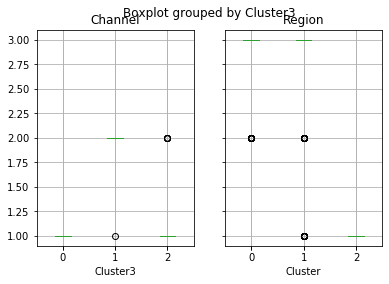

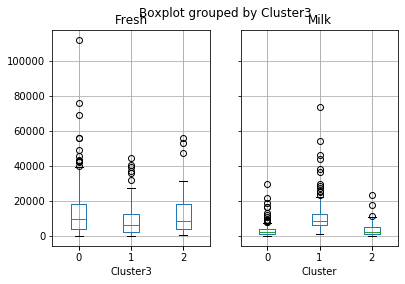

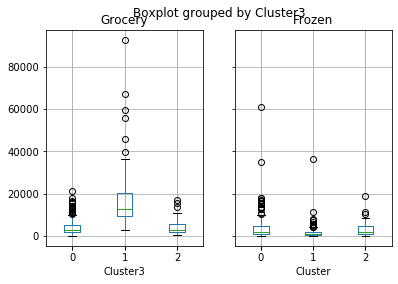

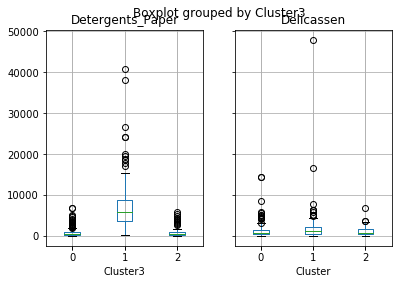

In [33]:
# Create boxplots for different attributes grouped by the three clusters
for i, elem in enumerate(zip(attr1,attr2)):
    slice=list(elem)
    df.boxplot(column=slice,by='Cluster3',layout=(1,2))
    plt.xlabel('Cluster')

Since the boxplots for channel and region were a bit difficult to read, let's plot value_counts for them.

In [34]:
for i in range(3):
    print('Cluster ',i)
    print('------------')
    print(df[df.Cluster3==i]['Channel'].value_counts())
    print(df[df.Cluster3==i]['Region'].value_counts())
    print(' ')

Cluster  0
------------
1    238
2      0
Name: Channel, dtype: int64
3    210
2     28
1      0
Name: Region, dtype: int64
 
Cluster  1
------------
2    137
1      1
Name: Channel, dtype: int64
3    106
2     19
1     13
Name: Region, dtype: int64
 
Cluster  2
------------
1    59
2     5
Name: Channel, dtype: int64
1    64
3     0
2     0
Name: Region, dtype: int64
 


If the three clusters are compared, following observations can be made of their differences:
    
Channel and region:
- Cluster 0: This is channel 1 (=Horeca) and 90% Region Other
- Cluster 1: This is mainly channel 2 (=Retail), and  75% Region Other
- Cluster 2: This is mainly channel 2 (=Horeca) and Region Lisnon

Other attributes:
- Cluster 0: High spend on Fresh products, low spend on all other products
- Cluster 1: Highest spend on Groceries and Detergents_paper products
- Cluster 2: High spend on Fresh products, low spend on all other products

When looking at the analysis, it seems that the clusters can be defined as follows. 

There are two clusters for Channel Horeca, which is mainly split by the region. Both of the Horeca clusters have high spend on Fresh products, low spend on all other products.

The third cluster is for Retail, for which spend is high on Groceries and Detergents_paper products.

## Conclusions

In this notebook, a clustering was performed on Wholesale customers. 

First, a clustering was done by finding the optimum k with the help of silhouette score. This resulted in ten clusters, which differed from each other both by channel, region and other attributes. 

After that a clustering was done by fixing the k as k=3. This resulted in two clusters for Horeca channel, mainly differing by region, and one cluster for region.

The strategy how many clusters should be formed, depends on the questions that are needing answers.